<a href="https://colab.research.google.com/github/ChloeZhou8/SDS510/blob/main/SDS_510_M3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Load Libaries and Data

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

In [15]:
df = pd.read_csv('/content/crimestat (1) 2.csv')

/tmp/ipython-input-161283748.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/crimestat (1) 2.csv')


,INC NUMBER,OCCURRED ON,OCCURRED TO,UCR CRIME CATEGORY,100 BLOCK ADDR,ZIP,PREMISE TYPE
0,2.016E+14,11/1/15 00:00,1/9/16 00:00,MOTOR VEHICLE THEFT,N 43RD AVE & W CACTUS RD,85029.0,SINGLE FAMILY HOUSE
1,2.016E+14,11/1/15 00:00,NaN,RAPE,13XX E ALMERIA RD,85006.0,SINGLE FAMILY HOUSE
2,2.015E+14,11/1/15 00:00,11/1/15 09:00,LARCENY-THEFT,51XX N 15TH ST,85014.0,APARTMENT
3,2.015E+14,11/1/15 00:00,11/1/15 05:00,MOTOR VEHICLE THEFT,102XX W MEDLOCK AVE,85307.0,SINGLE FAMILY HOUSE
4,2.015E+14,11/1/15 00:00,11/1/15 11:50,MOTOR VEHICLE THEFT,69XX W WOOD ST,85043.0,SINGLE FAMILY HOUSE
...,...,...,...,...,...,...,...
131672,201700000000000.0,11/17/17 04:15,11/17/17 04:30,LARCENY-THEFT,16XX E INDIAN SCHOOL RD,85016.0,CONVENIENCE MARKET / STORE
131673,201700000000000.0,11/17/17 05:00,11/17/17 09:50,MOTOR VEHICLE THEFT,43XX N 103RD AVE,85037.0,APARTMENT
131674,201700000000000.0,11/17/17 05:34,NaN,AGGRAVATED ASSAULT,8XX N 59TH AVE,85043.0,ABANDONED/CONDEMNED STRUCTURE
131675,201700000000000.0,11/17/17 05:50,11/17/17 07:50,BURGLARY,51XX N 39TH DR,85019.0,SINGLE FAMILY HOUSE


## Data Analysis

Get a good sense the overall crimes contained in this dataset

<Axes: xlabel='UCR CRIME CATEGORY'>

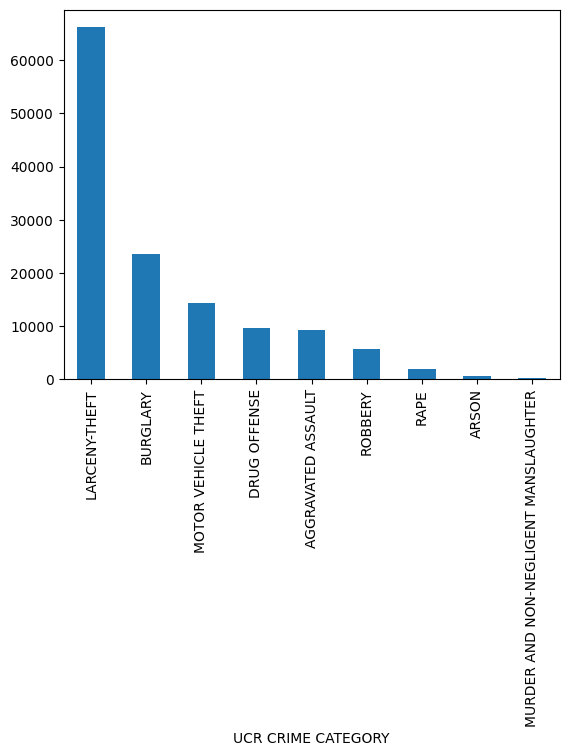

In [55]:
df['UCR CRIME CATEGORY'].value_counts().plot.bar()

Based on a simple value count we can tell that the most crime is larceny theft. Later I will looking at types of crimes and where they are most common.

In [57]:
df.groupby('UCR CRIME CATEGORY')['PREMISE TYPE'].value_counts(normalize=True)

AttributeError: 'PlotAccessor' object has no attribute 'heatmap'

In [59]:
df.groupby('UCR CRIME CATEGORY')['PREMISE TYPE'].value_counts(normalize=True)

# crime types sorted by frequency
crime_order = df['UCR CRIME CATEGORY'].value_counts().index

# group and normalize by location within each crime
grouped = df.groupby('UCR CRIME CATEGORY')['PREMISE TYPE'].value_counts(normalize=True)

# reorder the index by crime frequency
grouped = grouped.loc[crime_order]
print(grouped)


UCR CRIME CATEGORY                     PREMISE TYPE                
LARCENY-THEFT                          RETAIL BUSINESS                 0.141897
                                       PARKING LOT                     0.107880
                                       SINGLE FAMILY HOUSE             0.103490
                                       APARTMENT                       0.083521
                                       VEHICLE                         0.065309
                                                                         ...   
MURDER AND NON-NEGLIGENT MANSLAUGHTER  BUS                             0.003584
                                       LIGHT RAIL PLATFORM             0.003584
                                       OFFICE / COMMERCIAL BUILDING    0.003584
                                       RAIL STATION                    0.003584
                                       RESTAURANT                      0.003584
Name: proportion, Length: 535, dtype: float64


I used groupby with value_counts(normalize=True) to analyze the proportion of each crime type by premise type, that is, where each type of crime most often occurs. This gives insight into the context of each crime rather than just its frequency.

For example, AGGRAVATED ASSAULT occurs most frequently in apartments, street/roadway/alley/sidewalk, and single family houses, with those top 3 locations making up a large portion of all aggravated assault incidents. This suggests a strong concentration of this crime type in certain environments.

In contrast, while LARCENY-THEFT is the most common overall, it is more spread out across various locations such as retail businesses, parking lots, houses, and apartments. So even though it happens more often, it is not as location-specific as aggravated assault.

## Which areas have the fastest growing and shrinking crime rates

In [79]:
df.dtypes

# Convert OCCURRED ON to datetime
df['OCCURRED ON'] = pd.to_datetime(df['OCCURRED ON'])
df['YEAR'] = df['OCCURRED ON'].dt.year

# Group by zip code and year
zip_year = df.groupby(['ZIP', 'YEAR']).size().reset_index(name = 'crime_count')
crime_trend = zip_year.pivot(index='ZIP', columns='YEAR', values='crime_count').fillna(0)

# Calculate percent change over years
crime_trend['growth'] = crime_trend[crime_trend.columns[-1]] - crime_trend[crime_trend.columns[0]]

# Sort to see fastest growing/shrinking ZIPs
top_growing = crime_trend.sort_values('growth', ascending=False)
top_shrinking = crime_trend.sort_values('growth', ascending=True)

print(top_growing)
print(top_shrinking)

YEAR     2015.0  2016.0  2017.0  growth
ZIP                                    
85008.0   416.0  3034.0  2858.0  2442.0
85015.0   549.0  3447.0  2927.0  2378.0
85009.0   440.0  2552.0  2498.0  2058.0
85017.0   408.0  2512.0  2421.0  2013.0
85041.0   446.0  2590.0  2435.0  1989.0
...         ...     ...     ...     ...
85290.0     0.0     1.0     0.0     0.0
85268.0     1.0     0.0     0.0    -1.0
85258.0     1.0     1.0     0.0    -1.0
85225.0     1.0     5.0     0.0    -1.0
85363.0     1.0     0.0     0.0    -1.0

[98 rows x 4 columns]
YEAR     2015.0  2016.0  2017.0  growth
ZIP                                    
85225.0     1.0     5.0     0.0    -1.0
85258.0     1.0     1.0     0.0    -1.0
85363.0     1.0     0.0     0.0    -1.0
85268.0     1.0     0.0     0.0    -1.0
85210.0     0.0     3.0     0.0     0.0
...         ...     ...     ...     ...
85041.0   446.0  2590.0  2435.0  1989.0
85017.0   408.0  2512.0  2421.0  2013.0
85009.0   440.0  2552.0  2498.0  2058.0
85015.0   549.0  

## Group crimes into "violent" and "non-violent" categories

In [80]:
# Define violent crimes
violent_crimes = [
    'AGGRAVATED ASSAULT',
    'RAPE',
    'ROBBERY',
    'HOMICIDE',
    'MURDER AND NON-NEGLIGENT MANSLAUGHTER'
]
# Create new col in df called CRIME TYPE
df['CRIME TYPE'] = df['UCR CRIME CATEGORY'].apply(
    lambda x: 'Violent' if x in violent_crimes else 'Non-Violent'
)

<Axes: title={'center': 'Violent vs. Non-Violent Crime Trends'}, xlabel='YEAR'>

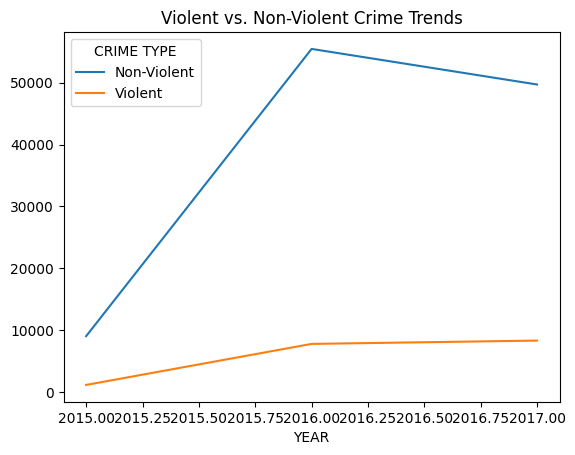

In [82]:
# Plot to compare violent vs. non-violent crimes over time
crime_by_type = df.groupby(['YEAR', 'CRIME TYPE']).size().unstack()
crime_by_type.plot(kind='line', title='Violent vs. Non-Violent Crime Trends')

Based on the line chart titled “Violent vs. Non-Violent Crime Trends”, we can observe a sharp increase in both violent and non-violent crime in the year 2016, compared to 2015. This simultaneous rise may suggest the presence of underlying external factors (such as economic conditions, population growth, or reporting changes) influencing crime rates in Phoenix during that period.

Additionally, non-violent crime continues to remain high, even though it appears to decline slightly in 2017. The overall trend suggests that non-violent crime consistently makes up the majority of criminal incidents, and its upward movement from 2015 to 2016 highlights a potential area of concern for law enforcement and policymakers.
